In [1]:
from random import random, seed, randrange
from math import floor, pi
import matplotlib.pyplot as plt
import numpy as np
import os
from time import time
import pandas as pd
from scipy.integrate import simps, trapz, cumtrapz
from scipy.ndimage.filters import gaussian_filter1d
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 9]

In [4]:
%run -i gcmc.py

In [12]:
yco = 1.0   #[]
P = 100 #[bar]


for i in range(1):
    
    P_res = P*10**5 #[Pa]
    T = 45 + 273.15 #K
    fco, fme = PR_Fugacity( P_res/10**5, T, yco )
    fco = fco*10**5
    fme = fme*10**5
    
    print( round( fme/10**5, 1 ), "bar")

    s_box = 100
    N_max = 50000
    Vol = s_box**3
    kb = 1.3806*10**(7) #[Pa*A^3/K]
    Nco = floor(fco*Vol/kb/T)
    Nme = floor(fme*Vol/kb/T)
    Nc = 0
    rc = s_box
    beta = 1/T
    zz_co = beta*fco
    zz_me = beta*fme
    delta = 1
    pi_move = 0.5

    N_moves = 1000
    N_equil = 10
    N_prod = 3000

    rhocov,rhomev,Env,Pv,Ncov, Nmev = mc_run()
    data_dump = pd.DataFrame()
    data_dump['ycf'] = Ncov/(Ncov + Nmev)
    data_dump['Pf'] = Pv*10 #[bar]
    data_dump['rhoco'] = rhocov
    data_dump['rhome'] = rhomev
    #filename = "../data_output/yco" + str(yco) + "P" + str(P) + "/run" + str(i) + ".csv"
    #data_dump.to_csv( filename, index = False)

59.4 bar
0 yco:  1.0 N:  1791.0 P:  175.36 En:  -50.01
300 yco:  1.0 N:  5843.0 P:  58.9 En:  -557.48
600 yco:  1.0 N:  8439.0 P:  50.73 En:  -762.01
900 yco:  1.0 N:  9837.0 P:  24.3 En:  -881.14
1200 yco:  1.0 N:  10467.0 P:  65.82 En:  -939.0
1500 yco:  1.0 N:  11033.0 P:  113.34 En:  -986.98
1800 yco:  1.0 N:  11211.0 P:  132.69 En:  -1000.4
2100 yco:  1.0 N:  11496.0 P:  127.12 En:  -1026.7
2400 yco:  1.0 N:  11663.0 P:  156.45 En:  -1042.87
2700 yco:  1.0 N:  11814.0 P:  137.24 En:  -1058.33


In [13]:
data_dump.to_csv( "pure_co2_p100_s100", index = False)

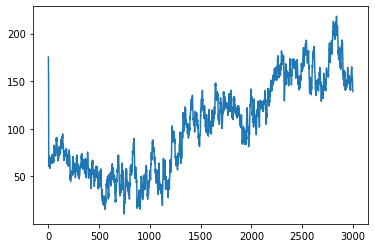

In [14]:
plt.plot( data_dump.Pf )

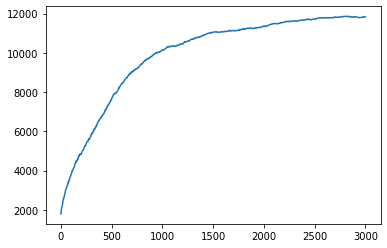

In [21]:
plt.plot( data_dump.rhoco*Vol)

In [22]:
exp_data = pd.read_csv("../c02.txt", sep='\t')
V = Vol*10**(-27)
exp_data['particles'] = exp_data['Density (mol/l)']*( 6.02*10**(23) )*V
exp_data[ exp_data['Pressure (bar)'] == 100]

,Temperature (K),Pressure (bar),Density (mol/l),Volume (l/mol),Internal Energy (kJ/mol),Enthalpy (kJ/mol),Entropy (J/mol*K),Cv (J/mol*K),Cp (J/mol*K),Sound Spd. (m/s),Joule-Thomson (K/bar),Viscosity (uPa*s),Therm. Cond. (W/m*K),Phase,particles
21,318.15,100.0,11.321,0.088328,14.443,15.326,64.595,46.891,355.66,224.75,0.42984,36.032,0.064793,supercritical,6815.242
